In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

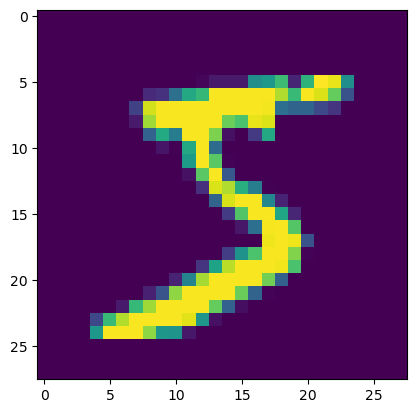

In [5]:
single_image=x_train[0]
plt.imshow(single_image)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Note: As is clear the first data is 5 and the second is 0 etc. it means that x_train[0] is 5 and x_train[1] is 0 etc. The thing is that if we train the model in this regard the model takes the form of regression problem however, it is classification. Thus, we can use to_categorical function.

In [7]:
from keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_example=to_categorical(y_train)

In [11]:
y_example.shape

(60000, 10)

We had ten numbers (from 0 to 9) and now all numbers from 0 to 9 have been in a separate array demonstrated with binaries.

In [12]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Note: in to_categorcal you can also consider the number of the classes with num_classes=X

In [13]:
y_cat_test=to_categorical(y_test, num_classes=10)

Note: to normalize the image data we do not need to use the previous functions. Since the image data is from 0 to 255 we can simly divide it to 255 so that each number in the arrays are between 0 to 1. 

In [14]:
y_cat_train=to_categorical(y_train, num_classes=10)

In [15]:
single_image.max()

255

In [16]:
single_image.min()

0

In [17]:
x_train=x_train/255
x_test=x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Note: plt.show() would consider the ratio of the numbers. Thus, in this case, even if we divde the data to 255 we stil will have the same figure.

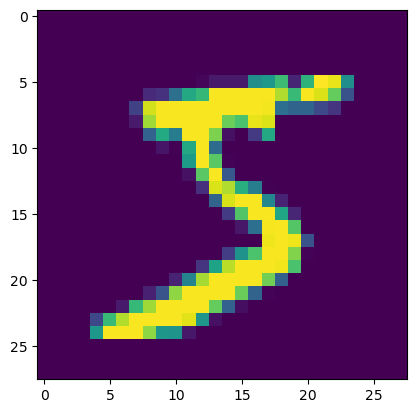

In [19]:
plt.imshow(single_image)

In [20]:
x_train.shape

(60000, 28, 28)

Note: As is clear, 60000 are the number of the figures, 28 is the height and the other 28 is the weight of the each figure. we have to add one more dimension to consider the color of the shapes. If the figure were color picture, we had had 3 layers (60000, 28, 28, 3) but now we just have one layer. 

In [21]:
x_train=x_train.reshape(60000,28,28,1)

In [22]:
x_test=x_test.reshape(10000,28,28,1)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Note: We want to create some thing the following articheture:
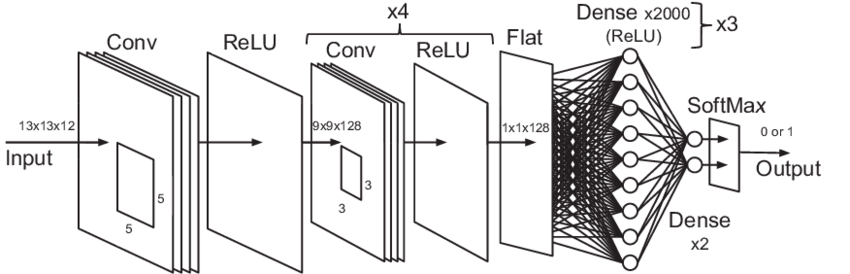

So, we would get the picture and with conv layers (filters) and maxpulling layers would change it, then we would flatt it to a datat that could be go through an ANN, then ANN would classify it to various classificans.

in conv2d filters is the number of filters. The kernel size is the size of the filter, strides are the steps that we go through the picture. Stride =(1,1) means steps in X is 1 and steps we go in the Y is also 1.

In the context of a Convolutional Neural Network (CNN), padding refers to the practice of adding extra rows and columns of zeros (or sometimes other values) around the borders of the input data. This is done before performing a convolution operation.

There are several reasons for using padding in Conv2D:

Preserve Spatial Dimensions: Without padding, the spatial dimensions (height and width) of the input will shrink after each convolution operation. Padding helps to preserve the original dimensions, which can be particularly useful when the network is deep and many convolutional layers are stacked together.

Centering the Filter: Padding allows the convolutional filter (kernel) to be applied to the edge pixels of the input. Without padding, the filter would not fully overlap with the edge pixels, potentially losing important information.

Control Output Size: By using padding, you can control the output size of the convolution operation. There are two commonly used padding schemes:

Valid Padding (No Padding): No padding is applied. The output size is smaller than the input size.
Same Padding: Padding is applied so that the output size is the same as the input size. The number of padding pixels added depends on the kernel size.

You can also see this:https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

Do we need padding here?
28/4=7
we do not have any decimal numbers so if we stride 1 to 1 we can cover all the 7 steps and the output size of the filter is equal to input.However, in the second filter with 7/4 has some decimal number thus we can use the same to gaurantee that the output is as same as inout in terms of the size.

Are the 32 filters sequentially back to back?

In the context of Convolutional Neural Networks (CNNs), the filters in a Conv2D layer are not applied sequentially back to back but rather in parallel. Each of the 32 filters in the Conv2D layer operates on the input data simultaneously and independently, producing 32 separate feature maps.

What about max pooling? Do we have only one max pooling layer? Or on every filter, do we have one max pooling?


In the given code, the MaxPooling2D layer is applied after the Conv2D layer. Here's how it works:

MaxPooling2D Layer: This layer operates on each of the 32 feature maps produced by the Conv2D layer. Max pooling is performed independently on each feature map. The operation reduces the spatial dimensions (height and width) of each feature map while retaining the depth (number of feature maps).
So, to clarify:

Single MaxPooling2D Layer: There is only one MaxPooling2D layer in the model. However, this single layer applies the pooling operation independently to each of the 32 feature maps generated by the preceding convolutional layer.

In [25]:
model= Sequential()

model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(2,2))
#so far we have one conv layer and one pulling layer. In the next step we would flat the image. if the image is 5*5, we would flat it as 25 data
model.add(Flatten())
#Note: After flatting, we can use an ANN layer for classification
model.add(Dense(256,activation='relu'))
#output layer: Note: for output lyaer, since we have a classification problem we shuold consider one neuron for each class.
model.add(Dense(10, activation='softmax'))
#note: the activation function for multiclass classification in the output layer is softmax
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'] )
#note: you can refer to https://keras.io/api/metrics/ and see all the metrics 

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop=EarlyStopping(monitor='val_loss', patience=2)

Note: we could also monitor the accuracy for the early stopping

In [28]:
model.fit(x_train,y_cat_train,epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9236 - loss: 0.2442 - val_accuracy: 0.9834 - val_loss: 0.0483
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9870 - loss: 0.0419 - val_accuracy: 0.9857 - val_loss: 0.0404
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9878 - val_loss: 0.0364
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9881 - val_loss: 0.0384
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9969 - loss: 0.0092 - val_accuracy: 0.9883 - val_loss: 0.0428


In [29]:
metrics=pd.DataFrame(model.history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.963250,0.120460,0.9834,0.048348
1,0.987983,0.039858,0.9857,0.040395
2,0.992633,0.023623,0.9878,0.036426
3,0.995067,0.015355,0.9881,0.038424
4,0.996650,0.010039,0.9883,0.042809


<AxesSubplot:>

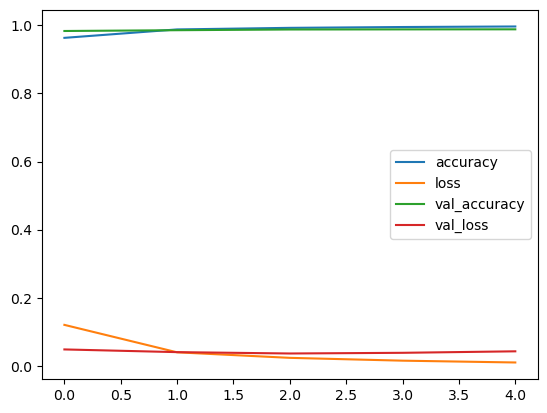

In [31]:
metrics.plot()

<AxesSubplot:>

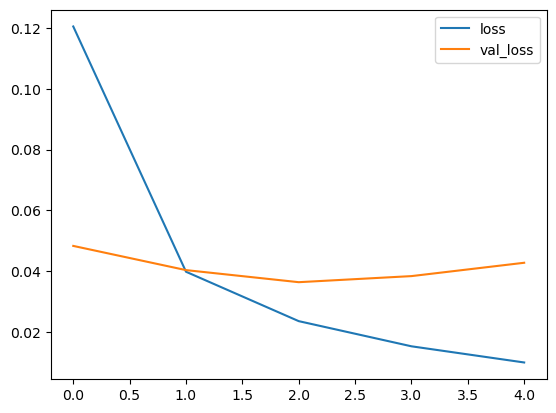

In [32]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

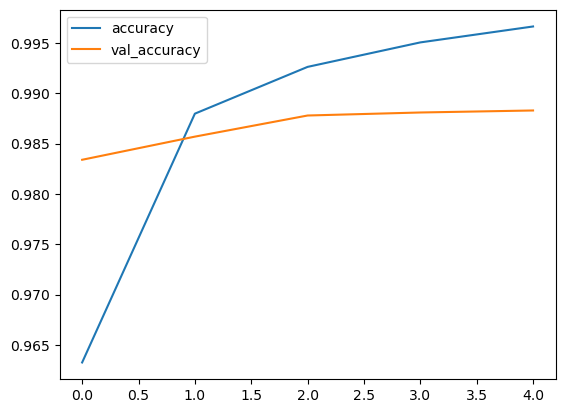

In [33]:
metrics[['accuracy','val_accuracy']].plot()

Note: As is clear in the figures after a few pochs the val_accuracy goes up.Howeve, the accuracy comes down. Which is a sign of overfitting. Then early stop has operated and stopped the training.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

Note: instead of "predictions = model.predict_classes(x_test)" use the following code:

In [36]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [39]:
print(classification_report(y_cat_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\moham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
my_number=x_test[3]

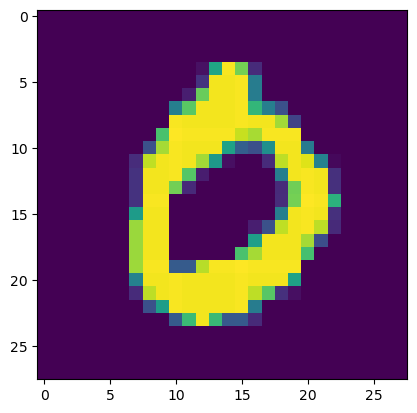

In [51]:
plt.imshow(my_number)

In [52]:
prediction = (model.predict(my_number.reshape(1,28,28,1)) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [53]:
prediction

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])